In [1]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          16824  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10184  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4721  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3715  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
!kaggle datasets download -d noulam/tomato

 99% 737M/743M [00:20<00:00, 20.1MB/s]
100% 743M/743M [00:20<00:00, 37.4MB/s]


In [ ]:
!unzip tomato.zip

In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import os
import random
import matplotlib.pyplot as plt

In [10]:
#resize all images to this
IMAGE_SIZE = [224,224]

train_path = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/valid'

In [11]:
disease_list = os.listdir(train_path)
disease_list

['Tomato___Bacterial_spot',
 'Tomato___Leaf_Mold',
 'Tomato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy',
 'Tomato___Target_Spot',
 'Tomato___Early_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite']

# Random Samples from each class

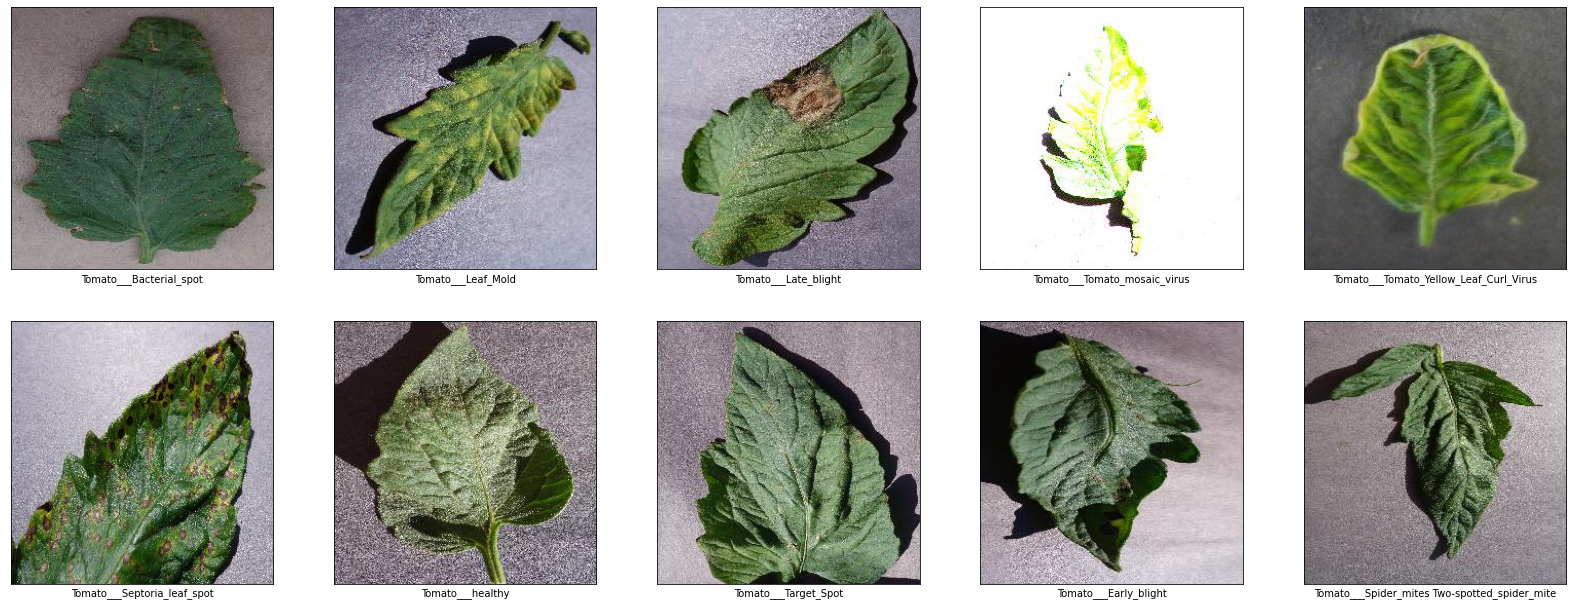

In [12]:
from tensorflow.keras.preprocessing.image import load_img
fig = plt.figure(figsize=(12,9))
fig.set_size_inches(28,28)
i = 0 
leaf = []
disease_name = []
leaf_image = []

for disease in disease_list:
  sample = random.sample(os.listdir(train_path+'/'+disease),1)
  leaf.append(sample)
  disease_name.append(disease)

for image in leaf:
  leaf_image.append(image[0])

for image in leaf_image:
  img = load_img(train_path+'/'+disease_name[i]+'/'+image)
  plt.subplot(5,5,i+1)
  plt.imshow(img)
  plt.xlabel(disease_name[i])
  plt.yticks([])
  plt.xticks([])
  i+=1

# Sample count in the dataset

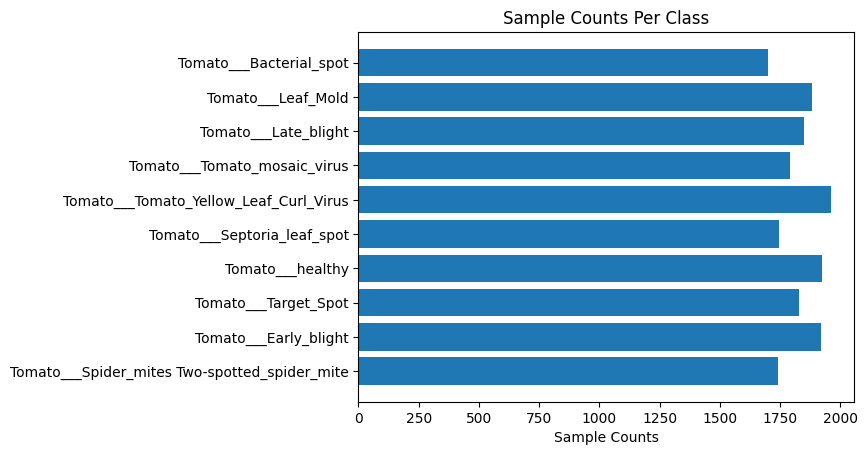

In [13]:
classes= []
sample_counts= []

for f in os.listdir(train_path):
    train_class_path= os.path.join(train_path, f)
    if os.path.isdir(train_class_path):
        classes.append(f)
        sample_counts.append(len(os.listdir(train_class_path)))

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(classes))

ax.barh(y_pos, sample_counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sample Counts')
ax.set_title('Sample Counts Per Class')

plt.show()

# Sample count in the Train and Test Data set

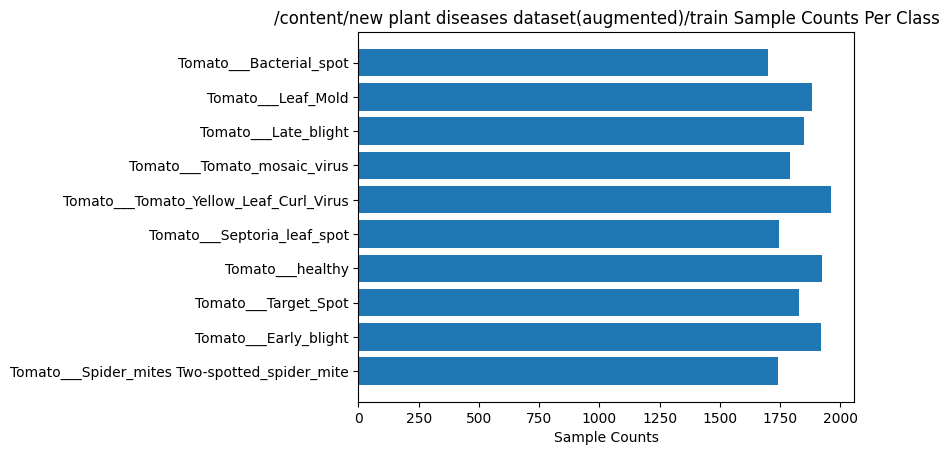

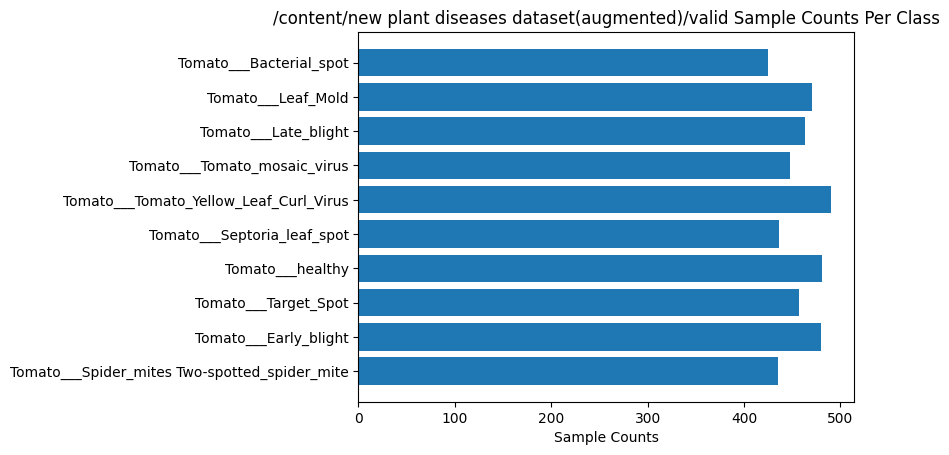

In [14]:
sample_counts= {}

for i, d in enumerate([train_path, valid_path]):

    classes= []
    sample_counts[d]= []

    for f in os.listdir(d):
        train_class_path= os.path.join(d, f)
        if os.path.isdir(train_class_path):
            classes.append(f)
            sample_counts[d].append(len(os.listdir(train_class_path)))

    #fig, ax= plt.subplot(221+i)
    fig, ax = plt.subplots()

    # Example data
    y_pos = np.arange(len(classes))

    ax.barh(y_pos, sample_counts[d], align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(classes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Sample Counts')
    ax.set_title('{} Sample Counts Per Class'.format(d.capitalize()))

plt.show()

# Loading the inception V3 network with imagenet pre-trained weights



In [15]:
inception = InceptionV3(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# vgg = VGG16(input_shape= IMAGE_SIZE  + [3], weights= 'imagenet', include_top=False )

87924736/87910968 [==============================] - 1s 0us/step


In [16]:
#Don't use existing weights 
for layer_inception in inception.layers:
  layer_inception.trainable = False

# for layer_vgg in vgg.layers:
#   layer_vgg.tomato  = False

In [17]:
folders = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')

In [18]:
folders

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite']

In [19]:
x = Flatten()(inception.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

In [21]:
model = Model(inputs=inception.input, outputs=prediction)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [23]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
training_set = test_datagen.flow_from_directory(train_path,
                                                target_size = (224,224),
                                                batch_size = 16,
                                                class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [26]:
test_set = test_datagen.flow_from_directory(valid_path,
                                                target_size = (224,224),
                                                batch_size = 16,
                                                class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [27]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  verbose =1
)

Epoch 1/10
1147/1147 [==============================] - 159s 126ms/step - loss: 3.7556 - accuracy: 0.7013 - val_loss: 2.7699 - val_accuracy: 0.8015
Epoch 2/10
1147/1147 [==============================] - 142s 124ms/step - loss: 2.1455 - accuracy: 0.8456 - val_loss: 2.6652 - val_accuracy: 0.8281
Epoch 3/10
1147/1147 [==============================] - 143s 124ms/step - loss: 1.4662 - accuracy: 0.8904 - val_loss: 3.3981 - val_accuracy: 0.8216
Epoch 4/10
1147/1147 [==============================] - 142s 124ms/step - loss: 1.2619 - accuracy: 0.9128 - val_loss: 3.8601 - val_accuracy: 0.8351
Epoch 5/10
1147/1147 [==============================] - 142s 124ms/step - loss: 1.1929 - accuracy: 0.9248 - val_loss: 4.2925 - val_accuracy: 0.8253
Epoch 6/10
1147/1147 [==============================] - 142s 124ms/step - loss: 0.9645 - accuracy: 0.9374 - val_loss: 4.1338 - val_accuracy: 0.8430
Epoch 7/10
1147/1147 [==============================] - 142s 124ms/step - loss: 0.6871 - accuracy: 0.9525 - val_

In [28]:
import matplotlib.pyplot as plt

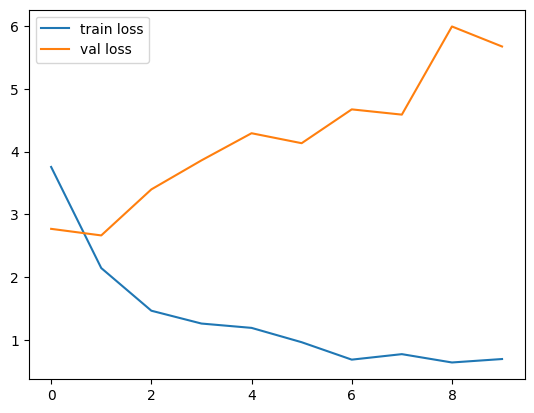

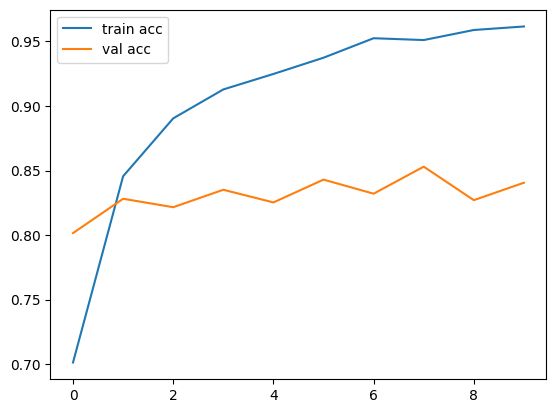

<Figure size 640x480 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [60]:
model.save("plant_disease.model")
model = tf.keras.models.load_model("plant_disease.model")


INFO:tensorflow:Assets written to: plant_disease.model/assets


In [83]:
!zip -r /content/file.zip /content/plant_disease.model

  adding: content/plant_disease.model/ (stored 0%)
  adding: content/plant_disease.model/variables/ (stored 0%)
  adding: content/plant_disease.model/variables/variables.index (deflated 79%)
  adding: content/plant_disease.model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/plant_disease.model/assets/ (stored 0%)
  adding: content/plant_disease.model/keras_metadata.pb (deflated 96%)
  adding: content/plant_disease.model/saved_model.pb (deflated 93%)


In [61]:
y_pred = model.predict(test_set)
y_pred


array([[0.0000000e+00, 5.3941481e-02, 2.5662905e-17, ..., 0.0000000e+00,
        2.2594974e-24, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.8716195e-32,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.0283420e-29, ..., 7.2708350e-23,
        8.0874786e-37, 2.0648180e-08],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [62]:
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([5, 5, 4, ..., 5, 1, 1])

# Tomato Early Blight as Test Image

In [71]:
test_img_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG"
test_img = plt.imread(test_img_path)

# Visualize

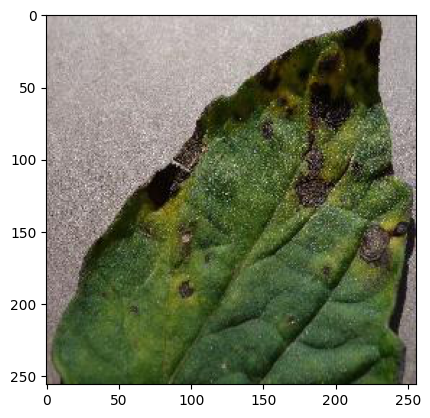

In [72]:
plt.imshow(test_img)

# load a image and detection

In [77]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)


# Class Dictionary

In [78]:
class_dict = training_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

# Label

In [79]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

# Prediction

In [81]:
prediction = model.predict([prepare(test_img_path)])
prediction_cls(prediction)

'Tomato___Early_blight'